<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive

#Accessing my Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## TUGAS PRAKTIKUM 

1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


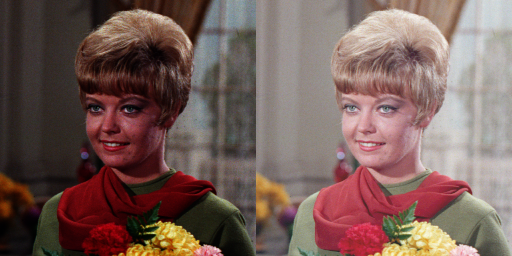

In [18]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
 gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
 print('Error, not a number') 
original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')

invGamma = 1 / gamma
#Variabel invGamma digunakan untuk menghitung nilai invers dari gamma

#table digunakan untuk membuat tabel transformasi piksel 
#dengan menghitung nilai gamma untuk setiap nilai piksel dalam rentang 0 hingga 255.
table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
adjusted = cv.LUT(original, table)
#adjusted digunakan untuk menerapkan transformasi pada citra 
#menggunakan tabel transformasi yang telah dibuat sebelumnya.
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


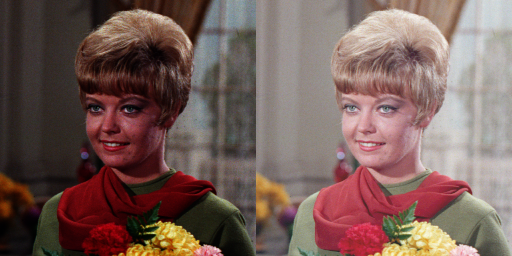

In [25]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try: 
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. membuat Simulasi Image Depth

Simulasi Image depth 
----------------------------------
Masukkan nilai bit depth [1-7]: 2


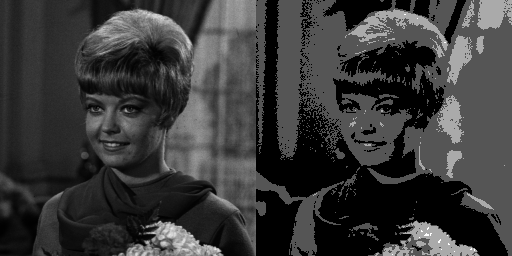

In [10]:
print('Simulasi Image depth ')
print('----------------------------------')
try:
  depth = int (input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)
level = 255/(2** depth - 1)

hasil = np.array(np.round((original/level))*level, dtype='uint8')

final_depth = cv.hconcat((original, hasil))
cv2_imshow(final_depth)

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


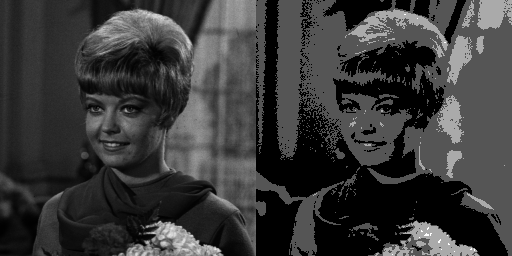

In [23]:

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    #for c in range(original.shape[2]):
     gamma_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

3. Membuat Modul Average Denoising

Nilai PSNR adalah 27.5388756168241 (dB)


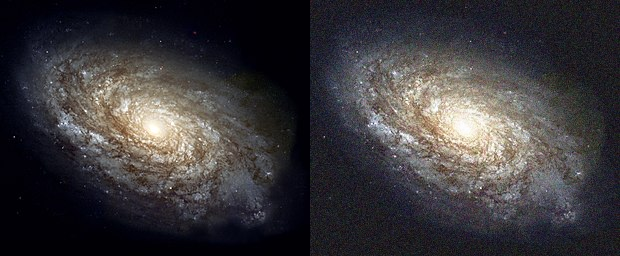

In [27]:
# 1. Jumlah Citra di Average - 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Image/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append👎

dst = cv_img[0]
noise_number = 4 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

In [ ]:
import glob
from math import log10, sqrt
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Image/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
def PSNR(original, compressed):
  first_image = cv_img[0]
  for x in range(1, compressed):
    if(x==0):
      continue
  first_image = first_image - cv_img[x]

  mse = np.mean((first_image) ** compressed)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr
#average 5
ori_img = cv_img[0]
noise_img = 5

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 5 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[4]))
cv2_imshow(final_frame)

#average 30
ori_img = cv_img[0]
noise_img = 30

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average0 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[29]))
cv2_imshow(final_frame)
#average 60
ori_img = cv_img[0]
noise_img = 60

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 60 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[59]))
cv2_imshow(final_frame)
#average 80
ori_img = cv_img[0]
noise_img = 80

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 80 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[79]))
cv2_imshow(final_frame)
#average 100
ori_img = cv_img[0]
noise_img = 100

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 100 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, cv_img[99]))
cv2_imshow(final_frame)